C:\Users\TUSHAR UPADHYAY\AppData\Local\Temp\ipykernel_5528\3114556503.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\TUSHAR UPADHYAY\\Desktop\\Python\\Bank_Loan_Analysis\\loan.csv")


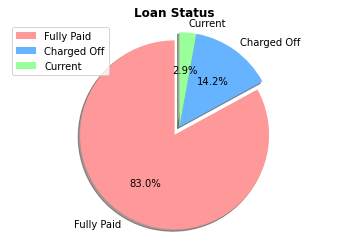

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("C:\\Users\\TUSHAR UPADHYAY\\Desktop\\Python\\Bank_Loan_Analysis\\loan.csv")

loan_status_counts = df['loan_status'].value_counts()


labels = loan_status_counts.index
sizes = loan_status_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1, 0, 0), colors=['#ff9999', '#66b3ff', '#99ff99'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


plt.legend(labels, loc='best')


plt.title('Loan Status', fontweight='bold')


plt.show()



In [ ]:
The percentage of loans that are charged off (14.2%) indicates a higher risk category. 
Full paid loans (83%) are generally considered lower risk,while the current loans (2.9%) may have some level of risk, 
but not as high as charged off loans.

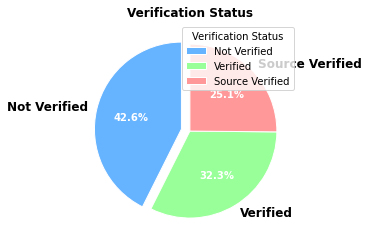

In [8]:

verification_status_counts = df['verification_status'].value_counts()


labels = verification_status_counts.index
sizes = verification_status_counts.values

colors = ['#66b3ff', '#99ff99', '#ff9999']
explode = (0.1, 0, 0)

fig, ax = plt.subplots()
wedges, text, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors, wedgeprops={'edgecolor': 'white'})


text_kwargs = dict(size=12, color='black', fontweight='bold')
autotext_kwargs = dict(size=10, color='white', fontweight='bold')
for t, at in zip(text, autotexts):
    t.set(**text_kwargs)
    at.set(**autotext_kwargs)


ax.set(aspect='equal')
ax.shadow = True


plt.legend(wedges, labels, title='Verification Status', loc='best')


plt.title('Verification Status', fontweight='bold')

plt.show()

In [ ]:
Loans that are not verified (42.6%) pose a higher risk since their borrower information and documentation may not have been adequately validated.
Verified loans (32.3%) are comparatively lower risk, and source verified loans (25.1%) provide an additional level of verification,
reducing risk further.

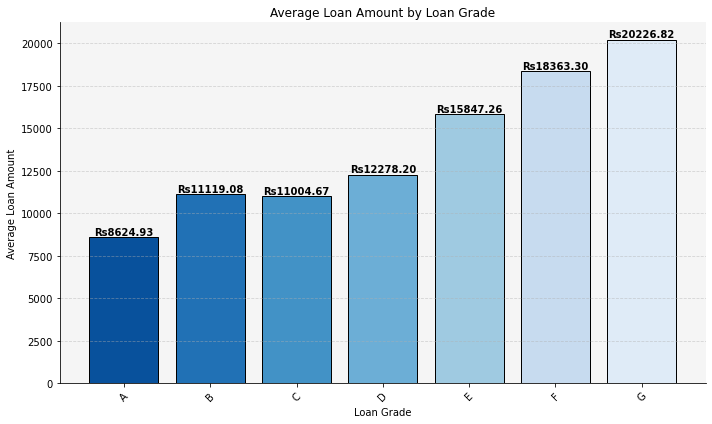

In [18]:

avg_loan_amounts = df.groupby('grade')['loan_amnt'].mean()

colors = sns.color_palette('Blues_r', len(avg_loan_amounts))

plt.figure(figsize=(10, 6))
plt.bar(avg_loan_amounts.index, avg_loan_amounts.values, color=colors, edgecolor='black')


plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Loan Grade')

plt.xticks(rotation=45)

for i, v in enumerate(avg_loan_amounts.values):
    plt.text(i, v, f"Rs{v:.2f}", ha='center', va='bottom', fontweight='bold')


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.gca().set_facecolor('#F5F5F5')

plt.tight_layout()

plt.show()

In [ ]:
G grade have highest interest and most of amount is on G grade which increases the high risk to repay because as loan amounts increase,
borrowers may face greater challenges in repaying larger loans. This can result in a higher default risk, 
especially when combined with higher interest rates. 

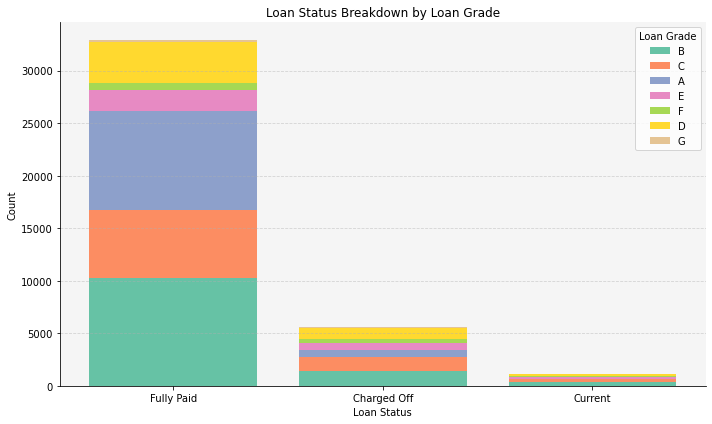

In [20]:

loan_grades = df['grade'].unique()

loan_status_counts = []
for grade in loan_grades:
    status_counts = df[df['grade'] == grade]['loan_status'].value_counts()
    
    loan_status_counts.append(status_counts)


colors = sns.color_palette('Set2', len(loan_grades))


plt.figure(figsize=(10, 6))

labels = loan_status_counts[0].index
bottom = [0] * len(labels)

for i, status_counts in enumerate(loan_status_counts):
    plt.bar(labels, status_counts, bottom=bottom, color=colors[i], label=loan_grades[i])
    bottom += status_counts


plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Breakdown by Loan Grade')
plt.legend(title='Loan Grade')


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.gca().set_facecolor('#F5F5F5')


plt.tight_layout()

plt.show()

In [ ]:
The fact that B grade loans have the highest count in the full paid category, followed by C, A, E, D, F, and G, 
implies that B grade loans are comparatively less risky than loans of other grades. 
Conversely, G grade loans have the highest count in the charged off category, suggesting they pose a higher risk.

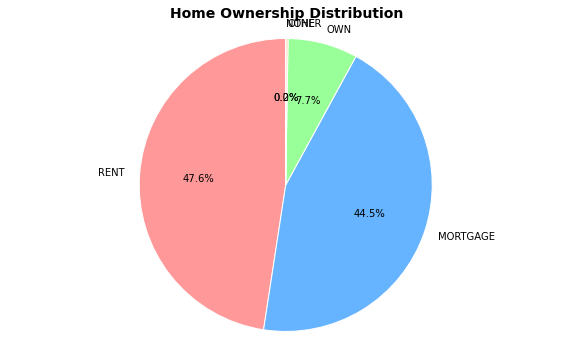

In [29]:

home_ownership_counts = df['home_ownership'].value_counts()


colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#CCCC99']

plt.figure(figsize=(10, 6))

plt.pie(home_ownership_counts.values, labels=home_ownership_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})


plt.axis('equal')

plt.title('Home Ownership Distribution', fontweight='bold', fontsize=14)

plt.show()

In [ ]:
The distribution of homeownership status can provide insights into risk assessment. For example, if a significant percentage of borrowers are on rent (46.6%),
they may have a higher likelihood of default compared to borrowers who own their homes (7.7%).

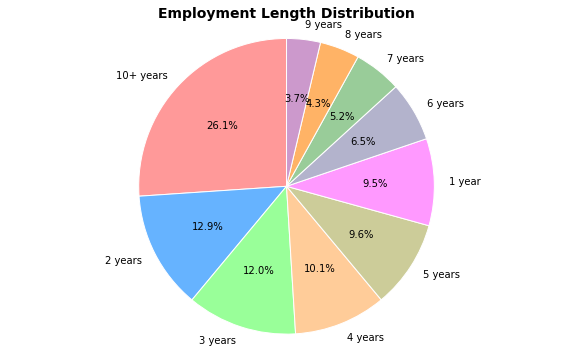

In [28]:

filtered_df = df[df['emp_length'].isin(['1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])]


employment_length_counts = filtered_df['emp_length'].value_counts()


labels = employment_length_counts.index
sizes = employment_length_counts.values


plt.figure(figsize=(10, 6))


colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#CCCC99', '#FF99FF', '#B3B3CC', '#99CC99', '#FFB366', '#CC99CC']


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

plt.axis('equal')

plt.title('Employment Length Distribution', fontweight='bold', fontsize=14)

plt.show()

In [ ]:
The distribution of employment length can be an important risk factor. Borrowers with longer employment tenures,
such as those with 10+ years of job experience (26.1%), generally exhibit greater stability and may present lower risk.

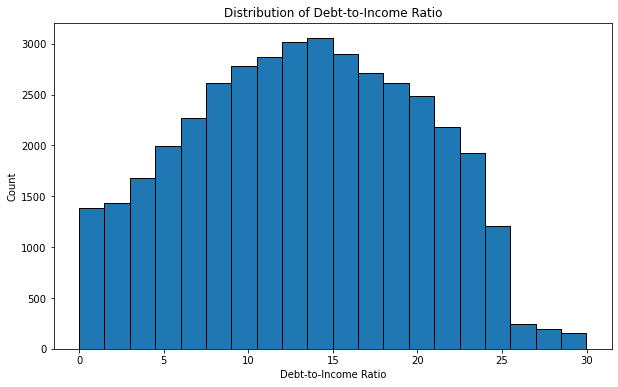

In [31]:

dti_ratios = df['dti']

plt.figure(figsize=(10, 6))
plt.hist(dti_ratios, bins=20, edgecolor='black')

plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Count')
plt.title('Distribution of Debt-to-Income Ratio')

plt.show()

In [ ]:
Significant portion of borrowers falls within the higher range of 15 to 20, it suggests a potential risk since
borrowers with higher debt relative to their income may struggle to repay their loans.

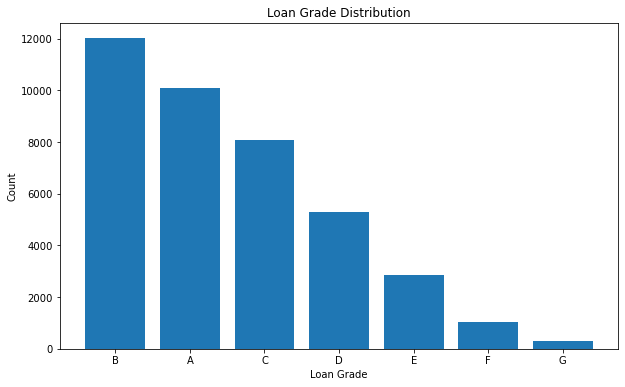

In [53]:

grade_counts = df['grade'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Loan Grade Distribution')

plt.show()

In [ ]:
Most of the loan is issued on moderate interset rate it show they have lower risk of repay and  Similar to the loan status breakdown,
if a particular loan grade, such as B grade, has the highest count,it implies that B grade loans may have a lower risk compared to other grades.